In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from tqdm import tqdm_notebook

In [2]:
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv")

# EDA

## 1. 대출상품결과(loan_result)

In [3]:
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [4]:
loan_result = loan_result[(-loan_result["loan_limit"].isna()) & (-loan_result["loan_rate"].isna())]

In [5]:
#중복 데이터 존재 -> 제거해야할듯 -> 안해도 된대
loan_result[loan_result.duplicated()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
1507095,2160853,2022-06-16 09:47:23,10,65,29000000.0,15.6,NaN
2292642,662921,2022-06-14 12:20:50,10,65,19000000.0,15.6,NaN
2453028,361861,2022-03-10 09:16:08,10,65,36000000.0,12.2,1.0
2656633,124917,2022-03-01 18:41:01,10,65,50000000.0,12.2,1.0
3026732,893666,2022-06-21 10:34:14,10,65,34000000.0,12.7,NaN
3081480,1008438,2022-06-21 14:50:56,22,221,3000000.0,18.4,NaN
3681411,176009,2022-03-14 15:04:55,10,65,31000000.0,12.2,1.0
5455325,424582,2022-06-13 10:56:40,10,65,43000000.0,14.2,NaN
5550899,707257,2022-06-27 09:03:12,10,65,50000000.0,12.7,NaN
6231370,43839,2022-03-22 13:10:59,10,65,28000000.0,12.5,1.0


In [6]:
loan_result["loan_limit"] += 250000

<ipython-input-6-792e47fd35af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_result["loan_limit"] += 250000


## 2. 유저로그데이터(log_data)

In [7]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [8]:
log_data.isna().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

## 3. 유저스펙테이블(user_spec)

In [9]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


데이터 전체 행 수 : 1,394,216

In [10]:
len(user_spec)

1394216

application_id(신청서) 수 : 1,394,216 ( == 데이터 전체 행 수)

In [11]:
len(user_spec["application_id"].unique())

1394216

user_id(이용자) 수 : 405,213\
 => 평균적으로 이용자 한 명당 약 3번 정도 핀다 신청을 함

In [12]:
len(user_spec["user_id"].unique())

405213

### loan_result에는 있지만 user_spec에는 없는 경우

**loan_result의 "application_id"와 user_spec의 "application_id"를 기준으로 merge**

In [13]:
loan_spec = pd.merge(loan_result,user_spec, how='left',on='application_id')

In [14]:
# 이 중에서 user_id가 결측인 값 => loan_result에 있는 application_id가 user_spec에는 없었다.
# 없음
loan_spec[loan_spec["user_id"].isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


### 날짜 형식 맞춰주기

In [15]:
# company_enter_month
company_enter_month_d = []
for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):
    try:
        company_enter_month_d.append(pd.to_datetime(i[0:6]+"01"))
    except:
        company_enter_month_d.append(np.nan)

<ipython-input-15-ea4bc05fa1fd>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):


  0%|          | 0/1394216 [00:00<?, ?it/s]

In [16]:
user_spec["company_enter_month"] = company_enter_month_d

In [17]:
# insert_time
user_spec["insert_time"] = pd.to_datetime(user_spec["insert_time"])

### 신용점수

In [18]:
tmp = user_spec[user_spec["credit_score"].isna()]
tmp

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaT,기타,전월세,30000000.0,사업자금,0.0,NaN,1.0,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
64,1036265,558745,1986.0,0.0,2022-06-07 17:20:08,NaN,48000000.0,EARNEDINCOME,2012-10-01,정규직,자가,280000000.0,주택구입,0.0,NaN,NaN,NaN
65,1930194,157472,1995.0,1.0,2022-06-07 16:34:09,NaN,40000000.0,EARNEDINCOME,2022-05-01,정규직,기타가족소유,7000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394120,1281112,493197,1987.0,1.0,2022-03-22 12:06:34,NaN,100000000.0,PRIVATEBUSINESS,2021-10-01,정규직,기타가족소유,50000000.0,사업자금,NaN,NaN,NaN,NaN
1394127,1121565,82805,1992.0,1.0,2022-03-22 11:42:39,NaN,30000000.0,EARNEDINCOME,2018-01-01,정규직,전월세,10000000.0,LIVING,NaN,NaN,NaN,NaN
1394141,1229782,250565,1989.0,1.0,2022-03-22 21:12:37,NaN,44000000.0,EARNEDINCOME,2018-04-01,정규직,전월세,20000000.0,기타,NaN,NaN,NaN,NaN
1394179,1264282,10298,1999.0,1.0,2022-03-22 14:31:24,NaN,10000000.0,FREELANCER,2021-06-01,기타,기타가족소유,3000000.0,전월세보증금,NaN,NaN,NaN,NaN


In [19]:
tmp.value_counts("employment_type")

employment_type
정규직    63748
기타     32630
계약직     7690
일용직     1044
dtype: int64

### purpose 명칭 통합

In [20]:
user_spec["purpose"].value_counts()

생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64

In [21]:
user_spec["purpose"].replace("LIVING", "생활비", inplace = True)
user_spec["purpose"].replace("SWITCHLOAN", "대환대출", inplace = True)
user_spec["purpose"].replace("BUSINESS", "사업자금", inplace = True)
user_spec["purpose"].replace("ETC", "기타", inplace = True)
user_spec["purpose"].replace("HOUSEDEPOSIT", "전월세보증금", inplace = True)
user_spec["purpose"].replace("BUYHOUSE", "주택구입", inplace = True)
user_spec["purpose"].replace("INVEST", "투자", inplace = True)
user_spec["purpose"].replace("BUYCAR", "자동차구입", inplace = True)

In [22]:
user_spec["purpose"].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

### income_type, employment_type, houseown_type 비율

In [23]:
user_spec["income_type"].value_counts()

EARNEDINCOME       892579
OTHERINCOME        172600
PRIVATEBUSINESS    126108
FREELANCER         103913
EARNEDINCOME2       78806
PRACTITIONER        20125
Name: income_type, dtype: int64

In [24]:
user_spec["employment_type"].value_counts()

정규직    918032
기타     345801
계약직    111445
일용직     18853
Name: employment_type, dtype: int64

In [25]:
user_spec["houseown_type"].value_counts()

전월세       642838
기타가족소유    465893
자가        283454
배우자         1946
Name: houseown_type, dtype: int64

In [26]:
user_spec["purpose"].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

### existing_loan_cnt, existing_loan_amt

In [27]:
user_spec[user_spec["existing_loan_cnt"].isna()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [28]:
user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [29]:
user_spec[(-user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["existing_loan_cnt"].value_counts()

1.0    115218
Name: existing_loan_cnt, dtype: int64

In [30]:
user_spec[user_spec["existing_loan_amt"] == 0]["existing_loan_cnt"].value_counts()

1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
6.0        1
9.0        1
5.0        1
Name: existing_loan_cnt, dtype: int64

# 결측치 대체

## user_spec

### 출생년도, 성별 결측치 대체

In [31]:
for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):
    user_spec.loc[i,"birth_year"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"birth_year"].mean()
    user_spec.loc[i,"gender"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"gender"].mean()

user_spec.isna().sum()

<ipython-input-31-50dd04275f99>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):


  0%|          | 0/12961 [00:00<?, ?it/s]

application_id                               0
user_id                                      0
birth_year                                9724
gender                                    9724
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

대체할 수 없는 출생년도와 성별은 대체보단 범주화

<AxesSubplot:>

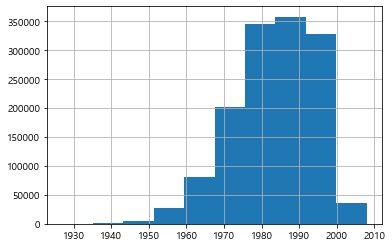

In [32]:
user_spec["birth_year"].hist()

In [33]:
user_spec["only_age"] = 2022 - user_spec["birth_year"]

**만으로 청소년(13-18세), 청년(19-29세), 중년(30-49세), 장년(50-64세), 노년(65세 이상)**

In [34]:
user_spec["cat_age"] =  pd.cut(user_spec["only_age"],[12,18, 29, 49, 64,100], right=False, labels=['청소년', '청년', '중년', '장년', '노년']).astype(object)
user_spec["cat_age"]

0          중년
1          장년
2          청년
3          중년
4          청년
           ..
1394211    청년
1394212    노년
1394213    중년
1394214    중년
1394215    중년
Name: cat_age, Length: 1394216, dtype: object

In [35]:
user_spec.loc[user_spec["cat_age"].isna(),"cat_age"] = "Missing_age"

In [36]:
user_spec["cat_gender"] = "Missing_gender"
user_spec.loc[user_spec["gender"] == 1,"cat_gender"] = "남성"
user_spec.loc[user_spec["gender"] == 0,"cat_gender"] = "여성"

나이 성별 범주화 완료

### 청소년 제거
어차피 loan_result에 없음!

In [37]:
user_spec = user_spec[-(user_spec["cat_age"] == "청소년")]

### 개인정보(yearly_income, income_type, employment_type, houseown_type, desired_amount, purpose) 결측치 대체

In [38]:
#income_type, employment_type, houseown_type, desired_amount, purpose 결측 85개
#yearly_income 결측 85개
user_info_na = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]
user_info_na

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0,48.0,중년,남성
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0,26.0,청년,남성
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0,26.0,청년,여성
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,중년,여성
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,29.0,중년,남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0,57.0,장년,남성
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0,27.0,청년,남성
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0,38.0,중년,남성
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0,50.0,장년,남성


**- 위의 85개 경우는 전부 loan_result에 없는 application_id 이다.**

In [39]:
l_list = []
for i in user_info_na["application_id"]:
    l_list.append(len(loan_result[loan_result["application_id"] == i]))

In [40]:
np.unique(l_list)

array([0])

따라서 삭제가 적절하다고 판단

#### yearly_income만 결측인 경우

In [41]:
# yearly_income만 결측인 값 5개
user_spec[(-user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaT,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN,27.0,청년,남성
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,2022-06-01,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0,27.0,청년,남성
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0,26.0,청년,여성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaT,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0,19.0,청년,남성


- 전부 6월 30일에 생성되었다는 특징이 있음, 이유는 발견 못함 -> 데이터를 잘라오면서 생긴 문제일 수 있음 QNA 20일 4번

- application_id : 341149 만 loan_result에 행이 존재

In [42]:
loan_result[loan_result["application_id"] == 341149]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
4495392,341149,2022-06-30 21:32:20,64,254,45250000.0,10.3,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35250000.0,16.4,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5250000.0,19.5,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15250000.0,12.5,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10250000.0,9.1,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23250000.0,15.4,NaN


#### 제거

yearly_income 기준 삭제
 - 그 전에 application_id 341149는 같은 user_id인 신청서가 존재하고 yearly_income이 0으로 적혀있었기 때문에 대체

In [43]:
user_spec[user_spec["user_id"] == 670502]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
566158,1746224,670502,1981.0,1.0,2022-06-30 22:41:11,930.0,0.0,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성


In [44]:
#같은 user의 다른 application을 이용하여 대체, 생성일시를 제외한 모든 조건이 동일하기 때문에 연소득 대체 가능하다고 판단
user_spec.loc[user_spec["application_id"] == 341149, "yearly_income"] = user_spec.loc[user_spec["user_id"] == 670502,"yearly_income"].mean()

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [45]:
#연소득 기준 결측인 행 삭제
user_spec = user_spec[-user_spec["yearly_income"].isna()]

### 입사년도 결측치 대체
입사년도 - 출생년도 : 몇 살에 입사를 했는가

생성년도 - 입사년도 : 입사한지 얼마나 지났는가 ( = 경력)

Quantile을 이용해 범주화

In [46]:
user_spec["aft_enter_time"] = (user_spec["insert_time"] - user_spec["company_enter_month"]).dt.days / 365

user_spec["cat_aft_enter_time"] =  pd.cut(user_spec["aft_enter_time"],
                                          [user_spec["aft_enter_time"].describe()["min"],
                                           user_spec["aft_enter_time"].describe()["25%"],
                                           user_spec["aft_enter_time"].describe()["50%"],
                                           user_spec["aft_enter_time"].describe()["75%"],
                                           user_spec["aft_enter_time"].describe()["max"]+1], right=False, labels=['0~25','25~50', '50~75','75~100']).astype(object)

user_spec["cat_aft_enter_time"] = user_spec["cat_aft_enter_time"].fillna("cat_aft_enter_NA")

In [47]:
user_spec["bef_enter_time"] = (user_spec["company_enter_month"].dt.year - user_spec["birth_year"])

user_spec["cat_bef_enter_time"] =  pd.cut(user_spec["bef_enter_time"],
                                          [user_spec["bef_enter_time"].describe()["min"],
                                           user_spec["bef_enter_time"].describe()["25%"],
                                           user_spec["bef_enter_time"].describe()["50%"],
                                           user_spec["bef_enter_time"].describe()["75%"],
                                           user_spec["bef_enter_time"].describe()["max"]+1], right=False, labels=['0~25','25~50', '50~75','75~100']).astype(object)

user_spec["cat_bef_enter_time"] = user_spec["cat_bef_enter_time"].fillna("cat_bef_enter_NA")

In [48]:
user_spec.value_counts(["cat_bef_enter_time","cat_aft_enter_time"]).reset_index()

,cat_bef_enter_time,cat_aft_enter_time,0
0,cat_bef_enter_NA,cat_aft_enter_NA,171623
1,75~100,25~50,90929
2,25~50,75~100,90184
3,75~100,50~75,89814
4,50~75,50~75,88934
5,0~25,75~100,85008
6,25~50,0~25,83215
7,75~100,0~25,82461
8,50~75,25~50,76671
9,50~75,75~100,76355


### personal_rehabilitation_yn, personal_rehabilitation_complete_yn

- 개인 회생자 신청 여부(0:개인회생자 X, 1:개인회생자O)
- 개인 회생 완료 여부(personal_rehabilitation_yn == 1인 사람들 중, 0:납입중, 1:완료)

4월18일에 개인회생자 전용 대출이 생김

4월18일 이전 데이터에서는 전부 (NA, NA)

상식적으로 존재 가능한 경우의 수 : (0,NA), (1,0), (1,1)

이상값인 0,0 or 0,1 는 아마도 개인회생자 여부를 체크 한 후, 다시 해제한 경우일 가능성이 있음!

-> 그렇다면 전부 0, NA로 대체하는 것이 옳음

In [49]:
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna()), "personal_rehabilitation_complete_yn"] = np.nan

In [50]:
print("NA,NA : ", user_spec[(user_spec["personal_rehabilitation_yn"].isna()) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

NA,NA :  (587360, 24)
1,NA : (0, 24)
1,0 or 1,1 : (12705, 24)
0,NA : (794005, 24)
0,0 or 0,1 : (0, 24)


**개인회생 관련 변수를 하나의 변수로 범주화**

In [51]:
user_spec["rehabilitation"] = "rehabilitation_not"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 0),"rehabilitation"] = "rehabilitation"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 1),"rehabilitation"] = "rehabilitation_completed"
user_spec.loc[(user_spec["personal_rehabilitation_yn"].isna()) & (user_spec["personal_rehabilitation_complete_yn"].isna()),"rehabilitation"] = "rehabilitation_NA"

rehabilitation_not : 개인회생자가 아님\
rehabilitation : 개인회생자이며, 납입중임\
rehabilitation_completed : 개인회생자이며, 납입 완료했음\
rehabilitation_NA : 아마도 앱 버전의 이유로 선택란이 없었을 것. 즉, 알 수 없음

In [52]:
user_spec["rehabilitation"].value_counts()

rehabilitation_not          794005
rehabilitation_NA           587360
rehabilitation               11358
rehabilitation_completed      1347
Name: rehabilitation, dtype: int64

### existing_loan_cnt, existing_loan_amt 결측치 대체

먼저, 기대출 횟수, 잔액이 변동된 경우는 없다.

In [53]:
user_loan_amt_min = user_spec.groupby("user_id").min()["existing_loan_amt"]
user_loan_amt_max = user_spec.groupby("user_id").max()["existing_loan_amt"]
user_loan_amt_min[user_loan_amt_min != user_loan_amt_max].max()

nan

In [54]:
user_loan_cnt_min = user_spec.groupby("user_id").min()["existing_loan_cnt"]
user_loan_cnt_max = user_spec.groupby("user_id").max()["existing_loan_cnt"]
user_loan_cnt_min[user_loan_cnt_min != user_loan_cnt_max].max()

nan

#### 기대출 횟수와 잔액의 NA여부를 바탕으로 그룹 형성

- 횟수가 0인 경우는 없음
- 잔액이 NA인 경우는 횟수가 NA또는 1
- 잔액이 0인 경우 존재

NA NA : 대출 경험 없음

1 NA : 이상값

!NA 0 : 이상값

!NA !NA : 기대출 보유자

In [55]:
loan_na_na = user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_na_na.value_counts("existing_loan_cnt")

Series([], dtype: int64)

In [56]:
loan_notna_na = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_notna_na.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0    115187
dtype: int64

In [57]:
loan_notna_notna = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (-user_spec["existing_loan_amt"].isna())]
loan_notna_notna.value_counts("existing_loan_cnt")

existing_loan_cnt
3.0      155923
2.0      145538
4.0      144384
1.0      126369
5.0      124044
          ...  
81.0          1
169.0         1
176.0         1
71.0          1
67.0          1
Length: 100, dtype: int64

In [58]:
loan_notna_0 = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"]==0)]
loan_notna_0.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
9.0        1
6.0        1
5.0        1
dtype: int64

#### <가설>
가설) !NA, 0인 값들은 기대출 잔액이 50만원보다 적어서 반올림 결과 0이 된 것이다.

가설) 1, NA인 값들은 대출 무경험자와, 대출 완납 경험자를 구분하기 위한 것이다. 즉, 1, NA는 완납 경험자이다. -> 그렇다면 집단 간 신용점수에 차이가 있을 것!

#### 그룹 간의 신용 점수에서 차이를 보였다.

In [59]:
loan_na_na["credit_score"].describe()

count    121232.000000
mean        665.470998
std         159.270887
min          60.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [60]:
loan_notna_na["credit_score"].describe()

count    112818.000000
mean        653.847081
std         160.652877
min         100.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [61]:
loan_notna_0["credit_score"].describe()

count    4988.000000
mean      722.082999
std       196.428333
min       100.000000
25%       610.000000
50%       730.000000
75%       880.000000
max      1000.000000
Name: credit_score, dtype: float64

In [62]:
loan_notna_notna["credit_score"].describe()

count    1.054966e+06
mean     6.336904e+02
std      1.152173e+02
min      9.000000e+01
25%      5.700000e+02
50%      6.200000e+02
75%      6.800000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

**집단 별 신용 점수 차이 검정**

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
#집단 크기 확인
loan_notna_na_c_score = loan_notna_na["credit_score"]
loan_notna_notna_c_score = loan_notna_notna["credit_score"]
loan_na_na_c_score = loan_na_na["credit_score"]
loan_notna_0_c_score = loan_notna_0["credit_score"]
print("<size>")
print("(!NA, NA) : ", len(loan_notna_na_c_score))
print("(!NA, !NA) : ", len(loan_notna_notna_c_score))
print("(NA, NA) : ", len(loan_na_na_c_score))
print("(!NA, 0) : ", len(loan_notna_0_c_score))

<size>
(!NA, NA) :  115187
(!NA, !NA) :  1080376
(NA, NA) :  198507
(!NA, 0) :  5130


Text(0.5, 1.0, '!NA,0')

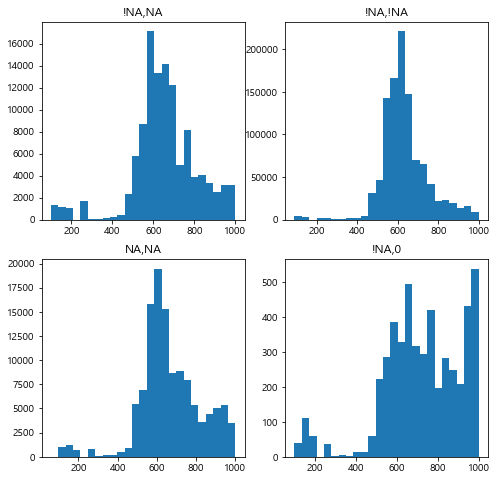

In [65]:
#정규성 확인 hist
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.hist(loan_notna_na_c_score,bins=25)
plt.title("!NA,NA")
plt.subplot(2,2,2)
plt.hist(loan_notna_notna_c_score,25)
plt.title("!NA,!NA")
plt.subplot(2,2,3)
plt.hist(loan_na_na_c_score,bins=25)
plt.title("NA,NA")
plt.subplot(2,2,4)
plt.hist(loan_notna_0_c_score,bins=25)
plt.title("!NA,0")

정규성검정 1 : Shapiro test

 - 전부 기각 (= 정규성을 만족하지 않음)

In [66]:
import scipy.stats as stats
from scipy.stats import shapiro
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",shapiro(loan_notna_na_c_score))
print("!NA,!NA : ",shapiro(loan_notna_notna_c_score))
print("NA,NA : ",shapiro(loan_na_na_c_score))
print("!NA,0 : ",shapiro(loan_notna_0_c_score))

H0 : 정규성을 충족한다
!NA,NA :  ShapiroResult(statistic=nan, pvalue=1.0)
!NA,!NA :  ShapiroResult(statistic=nan, pvalue=1.0)
NA,NA :  ShapiroResult(statistic=nan, pvalue=1.0)
!NA,0 :  ShapiroResult(statistic=nan, pvalue=1.0)


정규성검정 2 : D’Agostino’s K^2 Test

In [67]:
from scipy.stats import normaltest
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",normaltest(loan_notna_na_c_score))
print("!NA,!NA : ",normaltest(loan_notna_notna_c_score))
print("NA,NA : ",normaltest(loan_na_na_c_score))
print("!NA,0 : ",normaltest(loan_notna_0_c_score))

H0 : 정규성을 충족한다
!NA,NA :  NormaltestResult(statistic=nan, pvalue=nan)
!NA,!NA :  NormaltestResult(statistic=nan, pvalue=nan)
NA,NA :  NormaltestResult(statistic=nan, pvalue=nan)
!NA,0 :  NormaltestResult(statistic=nan, pvalue=nan)


정규성검정 3 : Kolmogorove-Smirnov test

In [68]:
from scipy.stats import kstest
print("H0 : 정규성을 충족한다")
print("!NA,NA : ",kstest(loan_notna_na_c_score, "norm"))
print("!NA,!NA : ",kstest(loan_notna_notna_c_score, "norm"))
print("NA,NA : ",kstest(loan_na_na_c_score, "norm"))
print("!NA,0 : ",kstest(loan_notna_0_c_score, "norm"))

H0 : 정규성을 충족한다
!NA,NA :  KstestResult(statistic=nan, pvalue=nan)
!NA,!NA :  KstestResult(statistic=nan, pvalue=nan)
NA,NA :  KstestResult(statistic=nan, pvalue=nan)
!NA,0 :  KstestResult(statistic=nan, pvalue=nan)


결론 : 4개의 집단 모두 정규성을 만족하지 않음.
    
--> 비모수적 방법인 맨 휘트니 U test(우측검정)사용

In [69]:
#맨휘트니 U test
from scipy.stats import mannwhitneyu
print("(!NA,NA) vs (!NA,!NA) : ",mannwhitneyu(loan_notna_na_c_score, loan_notna_notna_c_score, alternative='greater'))
#(!NA,NA) > (!NA,!NA)

print("(NA,NA) vs (!NA,NA) : ",mannwhitneyu(loan_na_na_c_score, loan_notna_na_c_score, alternative='greater'))
#(NA,NA) > (!NA,NA)

print("(!NA,0) vs (NA,NA) : ",mannwhitneyu(loan_notna_0_c_score, loan_na_na_c_score, alternative='greater'))
#(!NA,0) < (NA,NA)

print("(!NA,0) vs (!NA,NA) : ",mannwhitneyu(loan_notna_0_c_score, loan_notna_na_c_score, alternative='greater'))
#(!NA,0) > (NA,NA)

(!NA,NA) vs (!NA,!NA) :  MannwhitneyuResult(statistic=70251419752.0, pvalue=0.0)
(NA,NA) vs (!NA,NA) :  MannwhitneyuResult(statistic=15759166359.0, pvalue=0.0)
(!NA,0) vs (NA,NA) :  MannwhitneyuResult(statistic=393660012.5, pvalue=1.0)
(!NA,0) vs (!NA,NA) :  MannwhitneyuResult(statistic=367926719.0, pvalue=3.135706680840538e-195)


(!NA,NA) > (!NA,!NA)\
(NA,NA) > (!NA,NA)\
(!NA,0) < (NA,NA)\
(!NA,0) > (!NA,NA)

**<결론>**\
신용 점수 기준\
(NA, NA) > (!NA, 0) > (!NA,NA) > (!NA, !NA) 

In [70]:
# 이상치(대출 완납 경험자)를 구분하기 위한 범주형 변수 추가
user_spec["existing_loan_error"] = 0
user_spec.loc[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna()),"existing_loan_error"] = 1

In [71]:
user_spec["existing_loan_cnt_2"] = user_spec["existing_loan_cnt"].copy()
user_spec["existing_loan_amt_2"] = user_spec["existing_loan_amt"].copy()

user_spec.loc[-user_spec["existing_loan_amt_2"].isna(),"existing_loan_amt_2"] += 250000
user_spec.loc[user_spec["existing_loan_amt_2"].isna(),"existing_loan_cnt_2"] = 0

user_spec["existing_loan_amt_2"] = user_spec["existing_loan_amt_2"].fillna(0)

In [72]:
user_spec.isna().sum()

application_id                               0
user_id                                      0
birth_year                                9723
gender                                    9723
insert_time                                  0
credit_score                            105054
yearly_income                                0
income_type                                  0
company_enter_month                     171623
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587360
personal_rehabilitation_complete_yn    1381365
existing_loan_cnt                       198507
existing_loan_amt                       313694
only_age                                  9723
cat_age                                      0
cat_gender                                   0
aft_enter_time                          171623
cat_aft_enter

### Credit Score

In [73]:
user_spec2 = user_spec.drop(["birth_year","gender","company_enter_month","personal_rehabilitation_yn","personal_rehabilitation_complete_yn",
               "existing_loan_cnt","existing_loan_amt", "only_age","aft_enter_time", "bef_enter_time"],axis = 1)

In [74]:
user_spec2.isna().sum()

application_id              0
user_id                     0
insert_time                 0
credit_score           105054
yearly_income               0
income_type                 0
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
cat_age                     0
cat_gender                  0
cat_aft_enter_time          0
cat_bef_enter_time          0
rehabilitation              0
existing_loan_error         0
existing_loan_cnt_2         0
existing_loan_amt_2         0
dtype: int64

#### credit score가 NA가 아닌 행이 존재하는 user_id

NA\
NA --> 810으로 대체\
810\
810\
820

In [75]:
credit_na_ids = user_spec2[user_spec2["credit_score"].isna()]["user_id"].unique()

In [76]:
credit_not_na_ids = user_spec2[(user_spec2["user_id"].isin(credit_na_ids)) & (-user_spec2["credit_score"].isna())]["user_id"].unique()
credit_not_na_ids

array([553686,  93773, 131488, ..., 140245, 140769, 421807], dtype=int64)

In [77]:
df1 = user_spec2[user_spec2["user_id"].isin(credit_not_na_ids)].copy()
df2 = user_spec2[-user_spec2["user_id"].isin(credit_not_na_ids)].copy()

In [78]:
len(df1) + len(df2) == len(user_spec2)

True

In [79]:
df1_1 = pd.DataFrame()
for i in tqdm_notebook(credit_not_na_ids):
    df1_1 = df1_1.append(df1[df1["user_id"] == i].sort_values("insert_time").fillna(method='bfill'))

  0%|          | 0/10922 [00:00<?, ?it/s]

In [80]:
df1_1.isna().sum()

application_id         0
user_id                0
insert_time            0
credit_score           0
yearly_income          0
income_type            0
employment_type        0
houseown_type          0
desired_amount         0
purpose                0
cat_age                0
cat_gender             0
cat_aft_enter_time     0
cat_bef_enter_time     0
rehabilitation         0
existing_loan_error    0
existing_loan_cnt_2    0
existing_loan_amt_2    0
dtype: int64

In [81]:
len(df1_1) + len(df2) == len(user_spec2)

True

In [82]:
user_spec3 = pd.concat([df1_1,df2]).sort_index()

In [83]:
user_spec3.isna().sum()

application_id             0
user_id                    0
insert_time                0
credit_score           87464
yearly_income              0
income_type                0
employment_type            0
houseown_type              0
desired_amount             0
purpose                    0
cat_age                    0
cat_gender                 0
cat_aft_enter_time         0
cat_bef_enter_time         0
rehabilitation             0
existing_loan_error        0
existing_loan_cnt_2        0
existing_loan_amt_2        0
dtype: int64

In [84]:
user_spec3.to_csv("user_spec3.csv", index = False)
loan_result.to_csv("loan_result2.csv", index = False)

In [85]:
#user_spec3 = pd.read_csv("user_spec3.csv")
#loan_result = pd.read_csv("loan_result2.csv")

승인된 상품들의 한도, 금리에 대하여 통계량 값 추가\
한도는 log 변환

In [86]:
loan_result["log_loan_limit"] = np.log(loan_result["loan_limit"]+1)

features = ['application_id','loan_rate','log_loan_limit']
loan_result_preprocess = loan_result[features].groupby('application_id').agg(['max', 'min', 'mean','median',"count"])

In [87]:
loan_result_preprocess.columns=[i[1]+'_'+i[0] for i in loan_result_preprocess.columns]
loan_result_preprocess = loan_result_preprocess.reset_index()

In [88]:
user_spec3_1 = pd.merge(user_spec3, loan_result_preprocess, how='left', on="application_id")

In [89]:
#loan_rate 관련 변수는 999
user_spec3_1.loc[:,loan_result_preprocess.columns[1:5]] = user_spec3_1.loc[:,loan_result_preprocess.columns[1:5]].fillna(999) 
#loan_limit 관련 변수는 -999
user_spec3_1.loc[:,loan_result_preprocess.columns[6:10]] = user_spec3_1.loc[:,loan_result_preprocess.columns[6:10]].fillna(-999) 
#개수는 0
user_spec3_1.loc[:,["count_loan_rate","count_log_loan_limit"]] = user_spec3_1.loc[:,["count_loan_rate","count_log_loan_limit"]].fillna(0)

In [90]:
user_spec3_1.to_csv("user_spec3_1.csv",index=False)

#### MissForest

##### 신용점수 모델 검증

In [91]:
train_set = user_spec3[-user_spec3["credit_score"].isna()].copy()

In [92]:
np.random.seed(1234)
#랜덤하게 validset으로 사용할 user_id 선택
valid_ids = np.random.choice(train_set["user_id"], int(0.01*len(user_spec3)))
true_credit = train_set.loc[train_set["user_id"].isin(valid_ids), "credit_score"].copy()
train_set.loc[train_set["user_id"].isin(valid_ids), "credit_score"] = np.nan

In [93]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [94]:
from missingpy import MissForest
RS = 100
train_set_2 = train_set.copy()

In [95]:
train_set.drop("application_id",axis=1,inplace = True)
train_set.drop("user_id",axis=1,inplace = True)

#train_set["user_id"] = train_set["user_id"].astype('category')
train_set["cat_age"] = train_set["cat_age"].astype('category')
train_set["cat_aft_enter_time"] = train_set["cat_aft_enter_time"].astype('category')
train_set["cat_bef_enter_time"] = train_set["cat_bef_enter_time"].astype('category')
train_set["income_type"] = train_set["income_type"].astype('category')
train_set["employment_type"] = train_set["rehabilitation"].astype('category')
train_set["houseown_type"] = train_set["houseown_type"].astype('category')
train_set["purpose"] = train_set["purpose"].astype('category')
train_set["cat_gender"] = train_set["cat_gender"].astype('category')
train_set["rehabilitation"] = train_set["rehabilitation"].astype('category')
train_set['insert_time'] = pd.to_numeric(train_set['insert_time'])

In [96]:
## categorial label Encoder
cat_t = train_set[train_set.select_dtypes(['category']).columns.tolist()]

from sklearn import preprocessing

for col in train_set.select_dtypes(['category']).columns.tolist():
    le = preprocessing.LabelEncoder()
    le.fit(cat_t[col])
    train_set[col]=le.transform(cat_t[col])
    train_set[col] = train_set[col].astype('category')

In [97]:
fac_var = train_set.select_dtypes(['category']).columns

In [98]:
UseCols = train_set.columns.tolist()
cat_var = [idx for idx , col in enumerate(UseCols) if col in fac_var]
MISSForest_algo = MissForest(max_iter = 20, verbose = 0, n_jobs  = -1 , max_depth=10)
MISSForest_algo.fit(X =train_set  , cat_vars= cat_var)
Tr_imputed = MISSForest_algo.transform(train_set)
Tr_imputed = pd.DataFrame(Tr_imputed, columns= UseCols)                          
Tr_imputed[fac_var] = Tr_imputed[fac_var].astype(int)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [99]:
Tr_imputed.index = train_set.index
predict_credit = Tr_imputed.loc[train_set["credit_score"].isna(),"credit_score"]

In [100]:
#예측 신용점수 RMSE
print(np.sqrt(np.mean((true_credit - predict_credit)**2)))

88.30360643297637


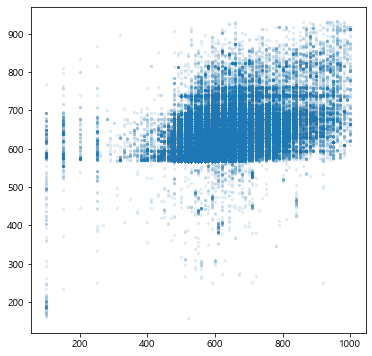

In [101]:
plt.figure(figsize=(6,6))
plt.scatter(true_credit, predict_credit, s=5,alpha=0.1)

##### 신용점수 모델링 및 예측

In [102]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [103]:
#!pip install missingpy

In [104]:
from missingpy import MissForest
RS = 100

In [110]:
credit_na_id = user_spec3_1.loc[user_spec3_1["credit_score"].isna(), "user_id"].unique()

In [111]:
user_spec3_1["insert_time"] = pd.to_datetime(user_spec3_1["insert_time"])

In [112]:
user_spec4 = user_spec3_1.copy()
user_spec4.drop(["user_id","application_id"],axis=1,inplace = True)
user_spec4["cat_age"] = user_spec4["cat_age"].astype('category')
user_spec4["cat_aft_enter_time"] = user_spec4["cat_aft_enter_time"].astype('category')
user_spec4["cat_bef_enter_time"] = user_spec4["cat_bef_enter_time"].astype('category')
user_spec4["income_type"] = user_spec4["income_type"].astype('category')
user_spec4["employment_type"] = user_spec4["rehabilitation"].astype('category')
user_spec4["houseown_type"] = user_spec4["houseown_type"].astype('category')
user_spec4["purpose"] = user_spec4["purpose"].astype('category')
user_spec4["cat_gender"] = user_spec4["cat_gender"].astype('category')
user_spec4["rehabilitation"] = user_spec4["rehabilitation"].astype('category')
user_spec4['insert_time'] = pd.to_numeric(user_spec4['insert_time'])

In [113]:
## categorial label Encoder
cat_t = user_spec4[user_spec4.select_dtypes(['category']).columns.tolist()]

from sklearn import preprocessing

for col in user_spec4.select_dtypes(['category']).columns.tolist():
    le = preprocessing.LabelEncoder()
    le.fit(cat_t[col])
    user_spec4[col]=le.transform(cat_t[col])
    user_spec4[col] = user_spec4[col].astype('category')

In [114]:
fac_var = user_spec4.select_dtypes(['category']).columns

In [115]:
UseCols = user_spec4.columns.tolist()
cat_var = [idx for idx , col in enumerate(UseCols) if col in fac_var]
MISSForest_algo = MissForest(max_iter = 20, verbose = 0, n_jobs  = -1 , max_depth=10)
MISSForest_algo.fit(X =user_spec4  , cat_vars= cat_var)
Tr_imputed = MISSForest_algo.transform(user_spec4)
Tr_imputed = pd.DataFrame(Tr_imputed, columns= UseCols)                          
Tr_imputed[fac_var] = Tr_imputed[fac_var].astype(int)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [116]:
Tr_imputed["user_id"] = user_spec3_1["user_id"]

In [117]:
tmp = Tr_imputed.loc[Tr_imputed["user_id"].isin(credit_na_id),["user_id","credit_score"]].groupby("user_id",as_index=False).mean()[["user_id","credit_score"]]
tmp["credit_score"] = round(tmp["credit_score"], -1)
tmp.rename(columns={"credit_score" : "credit_score2"}, inplace = True)

user_spec5 = pd.merge(user_spec3_1, tmp, how='left', on = "user_id")
user_spec5['credit_score_last'] = np.nansum((user_spec5["credit_score"], user_spec5["credit_score2"]), axis=0)

In [118]:
user_spec5.drop(["credit_score","credit_score2"],axis=1,inplace = True)

In [119]:
user_spec5.isna().sum()

application_id           0
user_id                  0
insert_time              0
yearly_income            0
income_type              0
employment_type          0
houseown_type            0
desired_amount           0
purpose                  0
cat_age                  0
cat_gender               0
cat_aft_enter_time       0
cat_bef_enter_time       0
rehabilitation           0
existing_loan_error      0
existing_loan_cnt_2      0
existing_loan_amt_2      0
max_loan_rate            0
min_loan_rate            0
mean_loan_rate           0
median_loan_rate         0
count_loan_rate          0
max_log_loan_limit       0
min_log_loan_limit       0
mean_log_loan_limit      0
median_log_loan_limit    0
count_log_loan_limit     0
credit_score_last        0
dtype: int64

In [120]:
user_spec5.to_csv("user_spec5.csv",index=False)

#### 선형 회귀 어쩌고 (배정민)

In [121]:
user_spec5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394070 entries, 0 to 1394069
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   application_id         1394070 non-null  int64         
 1   user_id                1394070 non-null  int64         
 2   insert_time            1394070 non-null  datetime64[ns]
 3   yearly_income          1394070 non-null  float64       
 4   income_type            1394070 non-null  object        
 5   employment_type        1394070 non-null  object        
 6   houseown_type          1394070 non-null  object        
 7   desired_amount         1394070 non-null  float64       
 8   purpose                1394070 non-null  object        
 9   cat_age                1394070 non-null  object        
 10  cat_gender             1394070 non-null  object        
 11  cat_aft_enter_time     1394070 non-null  object        
 12  cat_bef_enter_time     13940

# 모델링

## 모델1. application_id 별 대출 신청 여부 예측

In [122]:
loan_result_yn_df = loan_result.groupby("application_id",as_index=False).max()[["application_id","is_applied"]]
user_spec6 = pd.merge(user_spec5,loan_result_yn_df,how='left',on='application_id')
user_spec6

,application_id,user_id,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,cat_age,...,mean_loan_rate,median_loan_rate,count_loan_rate,max_log_loan_limit,min_log_loan_limit,mean_log_loan_limit,median_log_loan_limit,count_log_loan_limit,credit_score_last,is_applied
0,1249046,118218,2022-06-07 06:28:18,108000000.0,PRIVATEBUSINESS,기타,자가,1000000.0,기타,중년,...,999.000000,999.00,0.0,-999.000000,-999.000000,-999.000000,-999.000000,0.0,660.0,NaN
1,954900,553686,2022-06-07 14:29:03,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,대환대출,장년,...,11.541667,11.55,12.0,17.732521,15.473739,16.745923,16.681878,12.0,870.0,NaN
2,137274,59516,2022-06-07 21:40:22,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,생활비,청년,...,14.563636,14.50,11.0,17.914013,14.994166,16.521405,16.663323,11.0,710.0,NaN
3,1570936,167320,2022-06-07 09:40:27,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,생활비,중년,...,13.180000,13.30,25.0,17.962606,14.994166,15.779069,14.994166,25.0,820.0,NaN
4,967833,33400,2022-06-07 08:55:07,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,생활비,청년,...,16.100000,16.10,2.0,16.235879,15.925724,16.080801,16.080801,2.0,630.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394065,1864587,489900,2022-03-22 14:55:32,25000000.0,FREELANCER,기타,기타가족소유,5000000.0,사업자금,청년,...,16.600000,16.65,4.0,17.349197,14.994166,15.969405,15.767128,4.0,590.0,1.0
1394066,1327066,151422,2022-03-22 01:19:24,20000000.0,OTHERINCOME,기타,자가,50000000.0,생활비,노년,...,10.490000,10.40,10.0,18.423178,14.994166,16.875064,16.972341,10.0,980.0,0.0
1394067,1319606,173524,2022-03-22 07:34:32,75000000.0,EARNEDINCOME,정규직,자가,100000000.0,대환대출,중년,...,14.116667,14.35,18.0,18.423178,14.994166,15.656659,14.994166,18.0,750.0,0.0
1394068,1482466,766546,2022-03-22 22:12:35,50000000.0,EARNEDINCOME,정규직,자가,10000000.0,대환대출,중년,...,17.240000,17.80,5.0,16.823665,16.142788,16.519246,16.663323,5.0,640.0,0.0


In [123]:
user_spec6.to_csv("user_spec6.csv",index=False)

### Validation Set 분리

In [124]:
loan_result3 = pd.merge(loan_result,loan_result_yn_df.rename(columns={'is_applied':'is_applied_tot'}),how='left',on='application_id')
loan_result4 = pd.merge(loan_result3, user_spec6[["user_id","application_id"]], how="left", on="application_id")

In [125]:
loan_result4.to_csv('loan_result4.csv',index=False)

In [126]:
loan_result_df = loan_result4[loan_result4["is_applied"].notna()]
loan_result_test = loan_result4[loan_result4["is_applied"].isna()]

In [127]:
user_spec6_valid = user_spec6[(user_spec6["insert_time"] >= '2022-05-10') & (user_spec6["insert_time"] < '2022-06-01')]
user_spec6_train = user_spec6[user_spec6["insert_time"] < '2022-05-10']

In [128]:
# loan_result에 존재하지 않는 user_spec은 is_applied가 nan으로 표시되는데, 이는 대출 상품이 뜨지 않은 것이므로
# 대출 신청을 안했다(= 0 )로 처리함
user_spec6_valid["is_applied"].fillna(0, inplace=True)
user_spec6_train["is_applied"].fillna(0, inplace=True)

In [129]:
user_spec6_valid.to_csv("user_spec6_valid.csv",index=False)
user_spec6_train.to_csv("user_spec6_train.csv",index=False)

In [130]:
print(user_spec6_train.shape)
print(user_spec6_valid.shape)

(761411, 29)
(267927, 29)


In [131]:
y_train = user_spec6_train["is_applied"].copy()
x_train = user_spec6_train.copy()
x_train["insert_time"] = pd.to_numeric(pd.to_datetime(x_train["insert_time"]))

y_valid = user_spec6_valid["is_applied"].copy()
x_valid = user_spec6_valid.copy()
x_valid["insert_time"] = pd.to_numeric(pd.to_datetime(x_valid["insert_time"]))

yearly_income, desired_amount, existing_loan_amt_2는 log 변환을 진행

In [132]:
#x_train["user_id"] = x_train["user_id"].astype(object)
x_train = x_train.drop(["user_id"],axis=1).copy()
x_train["yearly_income"] = np.log10(x_train["yearly_income"]+1)
x_train["desired_amount"] = np.log10(x_train["desired_amount"]+1)
x_train["existing_loan_amt_2"] = np.log10(x_train["existing_loan_amt_2"]+1)

#x_valid["user_id"] = x_valid["user_id"].astype(object)
x_valid = x_valid.drop(["user_id"],axis=1).copy()
x_valid["yearly_income"] = np.log10(x_valid["yearly_income"]+1)
x_valid["desired_amount"] = np.log10(x_valid["desired_amount"]+1)
x_valid["existing_loan_amt_2"] = np.log10(x_valid["existing_loan_amt_2"]+1)

### Catboost

In [133]:
from catboost import CatBoostClassifier

In [134]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761411 entries, 153 to 1394069
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   application_id         761411 non-null  int64  
 1   insert_time            761411 non-null  int64  
 2   yearly_income          761411 non-null  float64
 3   income_type            761411 non-null  object 
 4   employment_type        761411 non-null  object 
 5   houseown_type          761411 non-null  object 
 6   desired_amount         761411 non-null  float64
 7   purpose                761411 non-null  object 
 8   cat_age                761411 non-null  object 
 9   cat_gender             761411 non-null  object 
 10  cat_aft_enter_time     761411 non-null  object 
 11  cat_bef_enter_time     761411 non-null  object 
 12  rehabilitation         761411 non-null  object 
 13  existing_loan_error    761411 non-null  int64  
 14  existing_loan_cnt_2    761411 non

In [135]:
cat_0=CatBoostClassifier(random_state=20,iterations=1000,cat_features=np.where(x_train.drop(["application_id","is_applied"],axis=1).dtypes != np.float)[0], depth=10)
cat_0.fit(x_train.drop(["application_id","is_applied"],axis=1),y_train)

Learning rate set to 0.17514
0:	learn: 0.5565858	total: 1.62s	remaining: 26m 56s
1:	learn: 0.4975733	total: 3.06s	remaining: 25m 25s
2:	learn: 0.4827666	total: 4.42s	remaining: 24m 28s
3:	learn: 0.4769461	total: 5.75s	remaining: 23m 52s
4:	learn: 0.4689227	total: 7.12s	remaining: 23m 36s
5:	learn: 0.4666965	total: 8.37s	remaining: 23m 6s
6:	learn: 0.4636152	total: 9.59s	remaining: 22m 40s
7:	learn: 0.4622190	total: 10.9s	remaining: 22m 37s
8:	learn: 0.4611797	total: 12.3s	remaining: 22m 37s
9:	learn: 0.4601277	total: 13.7s	remaining: 22m 38s
10:	learn: 0.4593160	total: 15.1s	remaining: 22m 36s
11:	learn: 0.4586641	total: 16.5s	remaining: 22m 39s
12:	learn: 0.4579627	total: 18s	remaining: 22m 44s
13:	learn: 0.4573944	total: 19.3s	remaining: 22m 40s
14:	learn: 0.4568389	total: 20.9s	remaining: 22m 50s
15:	learn: 0.4561582	total: 22.4s	remaining: 22m 56s
16:	learn: 0.4556247	total: 23.9s	remaining: 23m 2s
17:	learn: 0.4552394	total: 25.4s	remaining: 23m 7s
18:	learn: 0.4543562	total: 27s	

152:	learn: 0.4311081	total: 3m 50s	remaining: 21m 14s
153:	learn: 0.4310042	total: 3m 51s	remaining: 21m 12s
154:	learn: 0.4309363	total: 3m 53s	remaining: 21m 11s
155:	learn: 0.4307095	total: 3m 54s	remaining: 21m 10s
156:	learn: 0.4305393	total: 3m 56s	remaining: 21m 8s
157:	learn: 0.4303797	total: 3m 57s	remaining: 21m 7s
158:	learn: 0.4301232	total: 3m 59s	remaining: 21m 6s
159:	learn: 0.4300342	total: 4m	remaining: 21m 4s
160:	learn: 0.4298765	total: 4m 2s	remaining: 21m 3s
161:	learn: 0.4297672	total: 4m 4s	remaining: 21m 2s
162:	learn: 0.4296259	total: 4m 5s	remaining: 21m 1s
163:	learn: 0.4295078	total: 4m 7s	remaining: 20m 59s
164:	learn: 0.4294312	total: 4m 8s	remaining: 20m 58s
165:	learn: 0.4292846	total: 4m 10s	remaining: 20m 56s
166:	learn: 0.4292457	total: 4m 11s	remaining: 20m 55s
167:	learn: 0.4291057	total: 4m 13s	remaining: 20m 53s
168:	learn: 0.4290482	total: 4m 14s	remaining: 20m 52s
169:	learn: 0.4289049	total: 4m 16s	remaining: 20m 50s
170:	learn: 0.4288588	tota

303:	learn: 0.4147554	total: 7m 30s	remaining: 17m 10s
304:	learn: 0.4146714	total: 7m 31s	remaining: 17m 8s
305:	learn: 0.4145558	total: 7m 32s	remaining: 17m 6s
306:	learn: 0.4143898	total: 7m 34s	remaining: 17m 5s
307:	learn: 0.4143705	total: 7m 35s	remaining: 17m 3s
308:	learn: 0.4142999	total: 7m 37s	remaining: 17m 2s
309:	learn: 0.4141602	total: 7m 38s	remaining: 17m
310:	learn: 0.4140829	total: 7m 39s	remaining: 16m 58s
311:	learn: 0.4140238	total: 7m 41s	remaining: 16m 57s
312:	learn: 0.4139532	total: 7m 42s	remaining: 16m 55s
313:	learn: 0.4138638	total: 7m 44s	remaining: 16m 54s
314:	learn: 0.4138306	total: 7m 45s	remaining: 16m 52s
315:	learn: 0.4137808	total: 7m 47s	remaining: 16m 51s
316:	learn: 0.4136928	total: 7m 48s	remaining: 16m 49s
317:	learn: 0.4135527	total: 7m 49s	remaining: 16m 47s
318:	learn: 0.4135009	total: 7m 51s	remaining: 16m 45s
319:	learn: 0.4134161	total: 7m 52s	remaining: 16m 43s
320:	learn: 0.4133231	total: 7m 53s	remaining: 16m 42s
321:	learn: 0.41326

453:	learn: 0.4007807	total: 11m 3s	remaining: 13m 17s
454:	learn: 0.4007728	total: 11m 4s	remaining: 13m 16s
455:	learn: 0.4006893	total: 11m 6s	remaining: 13m 14s
456:	learn: 0.4006204	total: 11m 7s	remaining: 13m 13s
457:	learn: 0.4005557	total: 11m 8s	remaining: 13m 11s
458:	learn: 0.4005277	total: 11m 10s	remaining: 13m 10s
459:	learn: 0.4004729	total: 11m 11s	remaining: 13m 8s
460:	learn: 0.4003999	total: 11m 13s	remaining: 13m 6s
461:	learn: 0.4003596	total: 11m 14s	remaining: 13m 5s
462:	learn: 0.4002756	total: 11m 16s	remaining: 13m 4s
463:	learn: 0.4000979	total: 11m 17s	remaining: 13m 2s
464:	learn: 0.4000743	total: 11m 19s	remaining: 13m 1s
465:	learn: 0.4000393	total: 11m 20s	remaining: 12m 59s
466:	learn: 0.3998578	total: 11m 21s	remaining: 12m 58s
467:	learn: 0.3997691	total: 11m 23s	remaining: 12m 56s
468:	learn: 0.3996085	total: 11m 24s	remaining: 12m 55s
469:	learn: 0.3995729	total: 11m 25s	remaining: 12m 53s
470:	learn: 0.3995062	total: 11m 27s	remaining: 12m 51s
471

601:	learn: 0.3901393	total: 14m 33s	remaining: 9m 37s
602:	learn: 0.3900779	total: 14m 34s	remaining: 9m 35s
603:	learn: 0.3899319	total: 14m 36s	remaining: 9m 34s
604:	learn: 0.3898704	total: 14m 37s	remaining: 9m 33s
605:	learn: 0.3897883	total: 14m 39s	remaining: 9m 31s
606:	learn: 0.3897551	total: 14m 40s	remaining: 9m 30s
607:	learn: 0.3896776	total: 14m 42s	remaining: 9m 28s
608:	learn: 0.3896455	total: 14m 43s	remaining: 9m 27s
609:	learn: 0.3895333	total: 14m 45s	remaining: 9m 25s
610:	learn: 0.3894617	total: 14m 46s	remaining: 9m 24s
611:	learn: 0.3893788	total: 14m 48s	remaining: 9m 23s
612:	learn: 0.3893552	total: 14m 49s	remaining: 9m 21s
613:	learn: 0.3892191	total: 14m 51s	remaining: 9m 20s
614:	learn: 0.3891482	total: 14m 52s	remaining: 9m 18s
615:	learn: 0.3890859	total: 14m 54s	remaining: 9m 17s
616:	learn: 0.3889889	total: 14m 55s	remaining: 9m 16s
617:	learn: 0.3889152	total: 14m 57s	remaining: 9m 14s
618:	learn: 0.3887992	total: 14m 58s	remaining: 9m 13s
619:	learn

752:	learn: 0.3798626	total: 18m 20s	remaining: 6m
753:	learn: 0.3797665	total: 18m 21s	remaining: 5m 59s
754:	learn: 0.3796847	total: 18m 22s	remaining: 5m 57s
755:	learn: 0.3796317	total: 18m 24s	remaining: 5m 56s
756:	learn: 0.3796137	total: 18m 25s	remaining: 5m 54s
757:	learn: 0.3795526	total: 18m 26s	remaining: 5m 53s
758:	learn: 0.3795236	total: 18m 28s	remaining: 5m 51s
759:	learn: 0.3794944	total: 18m 29s	remaining: 5m 50s
760:	learn: 0.3793972	total: 18m 31s	remaining: 5m 48s
761:	learn: 0.3793193	total: 18m 32s	remaining: 5m 47s
762:	learn: 0.3792789	total: 18m 34s	remaining: 5m 46s
763:	learn: 0.3791517	total: 18m 36s	remaining: 5m 44s
764:	learn: 0.3790552	total: 18m 37s	remaining: 5m 43s
765:	learn: 0.3789763	total: 18m 38s	remaining: 5m 41s
766:	learn: 0.3789134	total: 18m 40s	remaining: 5m 40s
767:	learn: 0.3788691	total: 18m 41s	remaining: 5m 38s
768:	learn: 0.3788486	total: 18m 42s	remaining: 5m 37s
769:	learn: 0.3787229	total: 18m 44s	remaining: 5m 35s
770:	learn: 0.

903:	learn: 0.3708942	total: 21m 51s	remaining: 2m 19s
904:	learn: 0.3708634	total: 21m 53s	remaining: 2m 17s
905:	learn: 0.3707881	total: 21m 54s	remaining: 2m 16s
906:	learn: 0.3707360	total: 21m 56s	remaining: 2m 14s
907:	learn: 0.3706198	total: 21m 57s	remaining: 2m 13s
908:	learn: 0.3705725	total: 21m 58s	remaining: 2m 12s
909:	learn: 0.3705266	total: 22m	remaining: 2m 10s
910:	learn: 0.3704506	total: 22m 1s	remaining: 2m 9s
911:	learn: 0.3703723	total: 22m 3s	remaining: 2m 7s
912:	learn: 0.3702383	total: 22m 4s	remaining: 2m 6s
913:	learn: 0.3701927	total: 22m 5s	remaining: 2m 4s
914:	learn: 0.3700946	total: 22m 7s	remaining: 2m 3s
915:	learn: 0.3700488	total: 22m 8s	remaining: 2m 1s
916:	learn: 0.3699390	total: 22m 10s	remaining: 2m
917:	learn: 0.3698712	total: 22m 11s	remaining: 1m 58s
918:	learn: 0.3698203	total: 22m 13s	remaining: 1m 57s
919:	learn: 0.3697593	total: 22m 14s	remaining: 1m 56s
920:	learn: 0.3697001	total: 22m 16s	remaining: 1m 54s
921:	learn: 0.3696328	total: 2

In [136]:
mypredictions_proba = cat_0.predict_proba(x_valid.drop(["application_id","is_applied"],axis=1))

In [137]:
mypredictions = cat_0.predict(x_valid.drop(["application_id","is_applied"],axis=1))

In [138]:
mypredictions_045 = []
mypredictions_040 = []
mypredictions_035 = []
mypredictions_030 = []
mypredictions_025 = []
mypredictions_020 = []
mypredictions_015 = []
mypredictions_010 = []

for i in tqdm_notebook(mypredictions_proba):
    if i[1] >= 0.45:
        mypredictions_045.append(1)
    else:
        mypredictions_045.append(0)
    
    if i[1] >= 0.4:
        mypredictions_040.append(1)
    else:
        mypredictions_040.append(0)
        
    if i[1] >= 0.35:
        mypredictions_035.append(1)
    else:
        mypredictions_035.append(0)
        
    if i[1] >= 0.3:
        mypredictions_030.append(1)
    else:
        mypredictions_030.append(0)
        
    if i[1] >= 0.25:
        mypredictions_025.append(1)
    else:
        mypredictions_025.append(0)
        
    if i[1] >= 0.2:
        mypredictions_020.append(1)
    else:
        mypredictions_020.append(0)
        
    if i[1] >= 0.15:
        mypredictions_015.append(1)
    else:
        mypredictions_015.append(0)
        
    if i[1] >= 0.1:
        mypredictions_010.append(1)
    else:
        mypredictions_010.append(0)

myprediction_lst = [mypredictions, mypredictions_045, mypredictions_040, mypredictions_035, mypredictions_030,
                    mypredictions_025, mypredictions_020, mypredictions_015, mypredictions_010]

  0%|          | 0/267927 [00:00<?, ?it/s]

In [139]:
#fbeta-score 함수 생성
def my_fbeta_score(precision, recall, beta=1.5):
    return (1.0 + (beta ** 2)) * (precision * recall) / (((beta ** 2) * precision) + recall )

In [140]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

for i in range(9):
    print("기준값 : ", 5-i*0.5)
    print("accuracy_score : ",accuracy_score(y_valid, myprediction_lst[i]))
    print("recall_score : ",recall_score(y_valid, myprediction_lst[i]))
    print("precision_score : ",precision_score(y_valid, myprediction_lst[i]))
    print("f1_score : ",f1_score(y_valid, myprediction_lst[i]))
    print("f1.5_score : ",my_fbeta_score(precision_score(y_valid, myprediction_lst[i]), recall_score(y_valid, myprediction_lst[i])))
    print("\n")

기준값 :  5.0
accuracy_score :  0.7501185024279001
recall_score :  0.7334754797441365
precision_score :  0.6485728065944666
f1_score :  0.6884162516870665
f1.5_score :  0.7050756972988036


기준값 :  4.5
accuracy_score :  0.748898020729527
recall_score :  0.8103733822581445
precision_score :  0.6291984291984292
f1_score :  0.708385167204872
f1.5_score :  0.7444188662188723


기준값 :  4.0
accuracy_score :  0.7433144102684687
recall_score :  0.8707988297714088
precision_score :  0.6116738185465894
f1_score :  0.7185897776886659
f1.5_score :  0.7703808336645918


기준값 :  3.5
accuracy_score :  0.7341925225901085
recall_score :  0.9153766053453662
precision_score :  0.5955505658575613
f1_score :  0.721613940997807
f1.5_score :  0.7855700218467401


기준값 :  3.0
accuracy_score :  0.7239919828908621
recall_score :  0.9472901274359101
precision_score :  0.5818890682586579
f1_score :  0.7209328653911468
f1.5_score :  0.7938956675734512


기준값 :  2.5
accuracy_score :  0.714108693785994
recall_score :  0.968

f1.5 score가 가장 높은 2를 기준으로 이진 분류

### 변수 중요도

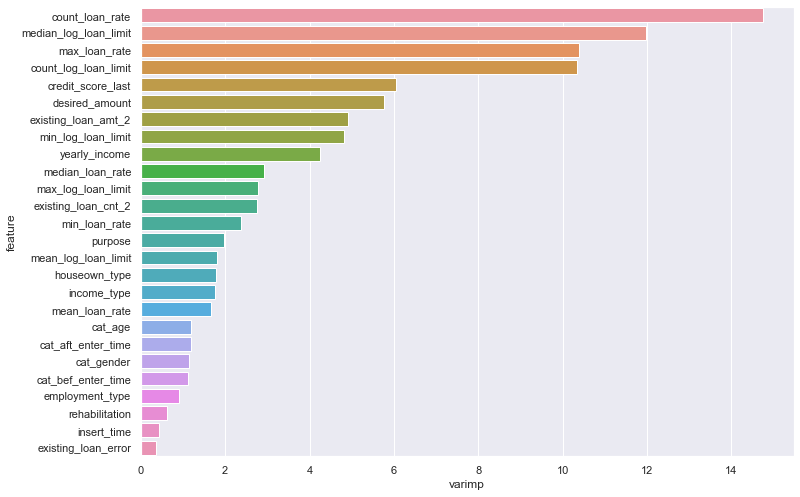

In [141]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
cat_feature_imp = pd.DataFrame([cat_0.feature_names_ , cat_0.feature_importances_]).T
cat_feature_imp.columns = ["feature","varimp"]
cat_feature_imp = cat_feature_imp.sort_values(by="varimp", ascending = False)
sns.barplot(y="feature", x="varimp",data = cat_feature_imp,)
plt.show()

In [142]:
x_valid["model1_pred"] = mypredictions_020

모델 1을 바탕으로 1로 예측된 application_id에 대해서 모델 2 진행

In [143]:
x_valid2 = x_valid[x_valid["model1_pred"] == 1].copy()
x_valid2

,application_id,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,cat_age,cat_gender,...,median_loan_rate,count_loan_rate,max_log_loan_limit,min_log_loan_limit,mean_log_loan_limit,median_log_loan_limit,count_log_loan_limit,credit_score_last,is_applied,model1_pred
937,1864566,1653989396000000000,7.908485,EARNEDINCOME,정규직,자가,8.000000,대환대출,중년,남성,...,13.90,37.0,18.067571,14.994166,16.041409,15.925724,37.0,670.0,1.0,1
939,278753,1654005891000000000,7.505150,EARNEDINCOME,정규직,전월세,7.301030,대환대출,중년,여성,...,9.40,19.0,17.433163,14.994166,16.776512,16.719676,19.0,620.0,1.0,1
940,1508331,1653992876000000000,7.544068,EARNEDINCOME,정규직,기타가족소유,6.477121,생활비,중년,남성,...,7.40,4.0,16.719676,16.719676,16.719676,16.719676,4.0,600.0,1.0,1
941,1953536,1654008107000000000,7.556303,OTHERINCOME,기타,전월세,6.301030,생활비,중년,남성,...,18.90,1.0,14.626441,14.626441,14.626441,14.626441,1.0,600.0,1.0,1
942,555109,1653991615000000000,7.477121,EARNEDINCOME,정규직,전월세,6.698970,생활비,중년,여성,...,19.90,1.0,16.321037,16.321037,16.321037,16.321037,1.0,560.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393714,744758,1653155439000000000,7.397940,EARNEDINCOME,정규직,기타가족소유,6.301030,생활비,중년,남성,...,16.20,16.0,16.871868,14.626441,16.029746,16.235879,16.0,600.0,1.0,1
1393715,612392,1653139438000000000,7.491362,EARNEDINCOME,정규직,전월세,7.079181,생활비,장년,남성,...,9.15,22.0,17.257530,14.994166,16.339799,16.663323,22.0,570.0,1.0,1
1393716,1340879,1653092848000000000,7.544068,EARNEDINCOME,정규직,기타가족소유,7.301030,생활비,중년,여성,...,12.90,11.0,17.510621,14.994166,16.132597,16.540090,11.0,750.0,1.0,1
1393717,321103,1653099975000000000,7.556303,PRACTITIONER,정규직,전월세,7.000000,생활비,청년,남성,...,7.70,5.0,16.540090,16.399508,16.511974,16.540090,5.0,630.0,1.0,1


## 모델2. 대출 신청할 것으로 예측한 사용자의 상품 별 대출 신청 여부 예측

In [144]:
applied_pred_appid_valid_lst = x_valid2["application_id"].unique()
applied_pred_appid_train_lst = x_train.loc[x_train["is_applied"]==1,"application_id"].unique()

In [145]:
loan_result_model2_valid = loan_result_df[loan_result_df["application_id"].isin(applied_pred_appid_valid_lst)]
loan_result_model2_train = loan_result_df[loan_result_df["application_id"].isin(applied_pred_appid_train_lst)]

In [146]:
loan_result_model2_train

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,log_loan_limit,is_applied_tot,user_id
13276,2157865,2022-05-09 08:44:59,54,235,20250000.0,16.5,1.0,16.823665,1.0,346970
13279,2136706,2022-05-09 10:41:06,42,216,10250000.0,13.5,0.0,16.142788,1.0,558819
13280,2136706,2022-05-09 10:41:07,25,169,22250000.0,15.9,0.0,16.917853,1.0,558819
13281,2136706,2022-05-09 10:41:07,22,221,10250000.0,18.4,0.0,16.142788,1.0,558819
13282,2136706,2022-05-09 10:41:06,44,8,3250000.0,14.8,0.0,14.994166,1.0,558819
...,...,...,...,...,...,...,...,...,...,...
13489690,896904,2022-05-09 11:13:22,54,259,40250000.0,16.9,0.0,17.510621,1.0,796907
13489691,896904,2022-05-09 11:13:33,62,200,20250000.0,14.3,1.0,16.823665,1.0,796907
13489695,813339,2022-05-09 05:08:27,10,149,28250000.0,13.3,1.0,17.156604,1.0,562322
13489696,813339,2022-05-09 05:08:27,10,65,28250000.0,13.3,0.0,17.156604,1.0,562322


In [147]:
loan_result_model2_train.to_csv("loan_result_model2_train.csv", index=False)
loan_result_model2_valid.to_csv("loan_result_model2_valid.csv", index=False)
loan_result_df.to_csv("loan_result_df.csv", index=False)

In [148]:
스탑!

SyntaxError: invalid syntax (<ipython-input-148-35ff3ec05de9>, line 1)

# 여기부터 시작하시오

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook 

loan_result_df = pd.read_csv("loan_result_df.csv")
loan_result_model2_train = pd.read_csv("loan_result_model2_train.csv")
loan_result_model2_valid = pd.read_csv("loan_result_model2_valid.csv")
user_spec6 = pd.read_csv("user_spec6.csv")

In [153]:
user_spec6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394070 entries, 0 to 1394069
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   application_id         1394070 non-null  int64         
 1   user_id                1394070 non-null  int64         
 2   insert_time            1394070 non-null  datetime64[ns]
 3   yearly_income          1394070 non-null  float64       
 4   income_type            1394070 non-null  object        
 5   employment_type        1394070 non-null  object        
 6   houseown_type          1394070 non-null  object        
 7   desired_amount         1394070 non-null  float64       
 8   purpose                1394070 non-null  object        
 9   cat_age                1394070 non-null  object        
 10  cat_gender             1394070 non-null  object        
 11  cat_aft_enter_time     1394070 non-null  object        
 12  cat_bef_enter_time     13940

Index(['max_loan_rate', 'min_loan_rate', 'mean_loan_rate', 'median_loan_rate',
       'count_loan_rate', 'max_log_loan_limit', 'min_log_loan_limit',
       'mean_log_loan_limit', 'median_log_loan_limit', 'count_log_loan_limit',
       'credit_score_last', 'is_applied'],
      dtype='object')

In [163]:
tmp = user_spec6.drop(user_spec6.columns[17:27+28],axis=1).copy()

In [180]:
train_model2 = pd.merge(loan_result_model2_train,tmp,how='left',on='application_id')

In [181]:
train_model2["loanapply_insert_time"] = pd.to_numeric(pd.to_datetime(train_model2["loanapply_insert_time"]))
train_model2["insert_time"] = pd.to_numeric(train_model2["insert_time"])

train_model2["log_desired_amount"] = np.log(train_model2["desired_amount"]+1)
train_model2["log_yearly_income"] = np.log(train_model2["yearly_income"]+1)
train_model2["log_existing_loan_amt_2"] = np.log(train_model2["existing_loan_amt_2"]+1)

train_model2.drop(["is_applied_tot","desired_amount","yearly_income","existing_loan_amt_2","loan_limit"],axis=1,inplace = True)

train_model2["bank_id"] = train_model2["bank_id"].astype(object)
train_model2["product_id"] = train_model2["product_id"].astype(object)

In [182]:
train_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500253 entries, 0 to 3500252
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   application_id           int64  
 1   loanapply_insert_time    int64  
 2   bank_id                  object 
 3   product_id               object 
 4   loan_rate                float64
 5   is_applied               float64
 6   log_loan_limit           float64
 7   user_id_x                int64  
 8   user_id_y                int64  
 9   insert_time              int64  
 10  income_type              object 
 11  employment_type          object 
 12  houseown_type            object 
 13  purpose                  object 
 14  cat_age                  object 
 15  cat_gender               object 
 16  cat_aft_enter_time       object 
 17  cat_bef_enter_time       object 
 18  rehabilitation           object 
 19  existing_loan_error      int64  
 20  existing_loan_cnt_2      float64
 21  log_desi

In [183]:
cat_2=CatBoostClassifier(random_state=20,iterations=1000,cat_features=np.where(train_model2.drop(["application_id","is_applied"],axis=1).dtypes != np.float)[0], depth=10)
cat_2.fit(train_model2.drop(["application_id","is_applied"],axis=1),train_model2["is_applied"])

Learning rate set to 0.335942
0:	learn: 0.4349818	total: 13.4s	remaining: 3h 42m 51s
1:	learn: 0.3126978	total: 24.6s	remaining: 3h 24m 11s
2:	learn: 0.2665120	total: 35.4s	remaining: 3h 16m 17s
3:	learn: 0.2470905	total: 47.2s	remaining: 3h 15m 50s
4:	learn: 0.2365893	total: 58s	remaining: 3h 12m 31s
5:	learn: 0.2317782	total: 1m 8s	remaining: 3h 7m 53s
6:	learn: 0.2287582	total: 1m 18s	remaining: 3h 5m 42s
7:	learn: 0.2245123	total: 1m 29s	remaining: 3h 5m 46s
8:	learn: 0.2219646	total: 1m 42s	remaining: 3h 8m 19s
9:	learn: 0.2186861	total: 1m 53s	remaining: 3h 6m 37s
10:	learn: 0.2165937	total: 2m 3s	remaining: 3h 4m 37s
11:	learn: 0.2152503	total: 2m 14s	remaining: 3h 3m 57s
12:	learn: 0.2133298	total: 2m 25s	remaining: 3h 4m 30s
13:	learn: 0.2106154	total: 2m 38s	remaining: 3h 6m 30s
14:	learn: 0.2096957	total: 2m 46s	remaining: 3h 2m 15s
15:	learn: 0.2088194	total: 2m 57s	remaining: 3h 2m 10s
16:	learn: 0.2080410	total: 3m 10s	remaining: 3h 3m 32s
17:	learn: 0.2075433	total: 3m 2

143:	learn: 0.1804056	total: 26m 49s	remaining: 2h 39m 24s
144:	learn: 0.1803558	total: 26m 56s	remaining: 2h 38m 50s
145:	learn: 0.1802951	total: 27m 11s	remaining: 2h 39m 3s
146:	learn: 0.1802119	total: 27m 25s	remaining: 2h 39m 5s
147:	learn: 0.1801523	total: 27m 37s	remaining: 2h 39m
148:	learn: 0.1801056	total: 27m 48s	remaining: 2h 38m 46s
149:	learn: 0.1800758	total: 28m 2s	remaining: 2h 38m 53s
150:	learn: 0.1800373	total: 28m 13s	remaining: 2h 38m 43s
151:	learn: 0.1799117	total: 28m 27s	remaining: 2h 38m 46s
152:	learn: 0.1798568	total: 28m 38s	remaining: 2h 38m 35s
153:	learn: 0.1798280	total: 28m 50s	remaining: 2h 38m 24s
154:	learn: 0.1797355	total: 29m 1s	remaining: 2h 38m 16s
155:	learn: 0.1796501	total: 29m 13s	remaining: 2h 38m 9s
156:	learn: 0.1796268	total: 29m 24s	remaining: 2h 37m 54s
157:	learn: 0.1795482	total: 29m 33s	remaining: 2h 37m 31s
158:	learn: 0.1795343	total: 29m 42s	remaining: 2h 37m 8s
159:	learn: 0.1794940	total: 29m 53s	remaining: 2h 36m 55s
160:	le

283:	learn: 0.1730806	total: 53m 59s	remaining: 2h 16m 6s
284:	learn: 0.1730401	total: 54m 11s	remaining: 2h 15m 58s
285:	learn: 0.1730023	total: 54m 24s	remaining: 2h 15m 50s
286:	learn: 0.1729767	total: 54m 35s	remaining: 2h 15m 36s
287:	learn: 0.1729394	total: 54m 47s	remaining: 2h 15m 28s
288:	learn: 0.1728229	total: 55m 2s	remaining: 2h 15m 24s
289:	learn: 0.1727936	total: 55m 12s	remaining: 2h 15m 8s
290:	learn: 0.1727413	total: 55m 22s	remaining: 2h 14m 56s
291:	learn: 0.1726836	total: 55m 36s	remaining: 2h 14m 50s
292:	learn: 0.1726420	total: 55m 48s	remaining: 2h 14m 38s
293:	learn: 0.1725661	total: 56m	remaining: 2h 14m 29s
294:	learn: 0.1725262	total: 56m 13s	remaining: 2h 14m 22s
295:	learn: 0.1724716	total: 56m 27s	remaining: 2h 14m 15s
296:	learn: 0.1724598	total: 56m 36s	remaining: 2h 13m 59s
297:	learn: 0.1724205	total: 56m 48s	remaining: 2h 13m 49s
298:	learn: 0.1723557	total: 57m	remaining: 2h 13m 39s
299:	learn: 0.1723177	total: 57m 12s	remaining: 2h 13m 29s
300:	lea

420:	learn: 0.1676930	total: 1h 21m 50s	remaining: 1h 52m 33s
421:	learn: 0.1676485	total: 1h 22m 2s	remaining: 1h 52m 21s
422:	learn: 0.1676034	total: 1h 22m 10s	remaining: 1h 52m 5s
423:	learn: 0.1675387	total: 1h 22m 21s	remaining: 1h 51m 52s
424:	learn: 0.1675228	total: 1h 22m 30s	remaining: 1h 51m 37s
425:	learn: 0.1674903	total: 1h 22m 42s	remaining: 1h 51m 26s
426:	learn: 0.1674619	total: 1h 22m 52s	remaining: 1h 51m 13s
427:	learn: 0.1674100	total: 1h 23m 4s	remaining: 1h 51m 1s
428:	learn: 0.1673693	total: 1h 23m 15s	remaining: 1h 50m 48s
429:	learn: 0.1673106	total: 1h 23m 28s	remaining: 1h 50m 38s
430:	learn: 0.1672801	total: 1h 23m 39s	remaining: 1h 50m 26s
431:	learn: 0.1672383	total: 1h 23m 50s	remaining: 1h 50m 13s
432:	learn: 0.1671876	total: 1h 24m 1s	remaining: 1h 50m 1s
433:	learn: 0.1671468	total: 1h 24m 12s	remaining: 1h 49m 48s
434:	learn: 0.1671325	total: 1h 24m 22s	remaining: 1h 49m 35s
435:	learn: 0.1671033	total: 1h 24m 36s	remaining: 1h 49m 26s
436:	learn: 0.

553:	learn: 0.1630518	total: 1h 47m 25s	remaining: 1h 26m 28s
554:	learn: 0.1630210	total: 1h 47m 38s	remaining: 1h 26m 18s
555:	learn: 0.1630054	total: 1h 47m 46s	remaining: 1h 26m 3s
556:	learn: 0.1629799	total: 1h 47m 55s	remaining: 1h 25m 50s
557:	learn: 0.1629686	total: 1h 48m 7s	remaining: 1h 25m 38s
558:	learn: 0.1629520	total: 1h 48m 16s	remaining: 1h 25m 25s
559:	learn: 0.1629385	total: 1h 48m 23s	remaining: 1h 25m 10s
560:	learn: 0.1629030	total: 1h 48m 31s	remaining: 1h 24m 55s
561:	learn: 0.1628618	total: 1h 48m 45s	remaining: 1h 24m 45s
562:	learn: 0.1628364	total: 1h 48m 56s	remaining: 1h 24m 33s
563:	learn: 0.1628359	total: 1h 49m 7s	remaining: 1h 24m 21s
564:	learn: 0.1627733	total: 1h 49m 19s	remaining: 1h 24m 10s
565:	learn: 0.1627721	total: 1h 49m 27s	remaining: 1h 23m 55s
566:	learn: 0.1627583	total: 1h 49m 37s	remaining: 1h 23m 43s
567:	learn: 0.1627205	total: 1h 49m 49s	remaining: 1h 23m 31s
568:	learn: 0.1626734	total: 1h 50m 2s	remaining: 1h 23m 20s
569:	learn: 

689:	learn: 0.1591269	total: 2h 12m 42s	remaining: 59m 37s
690:	learn: 0.1591083	total: 2h 12m 54s	remaining: 59m 25s
691:	learn: 0.1590830	total: 2h 13m 4s	remaining: 59m 13s
692:	learn: 0.1590707	total: 2h 13m 13s	remaining: 59m 1s
693:	learn: 0.1590339	total: 2h 13m 27s	remaining: 58m 50s
694:	learn: 0.1590246	total: 2h 13m 37s	remaining: 58m 38s
695:	learn: 0.1589893	total: 2h 13m 50s	remaining: 58m 27s
696:	learn: 0.1589791	total: 2h 14m 1s	remaining: 58m 15s
697:	learn: 0.1589675	total: 2h 14m 9s	remaining: 58m 2s
698:	learn: 0.1589390	total: 2h 14m 23s	remaining: 57m 52s
699:	learn: 0.1589309	total: 2h 14m 32s	remaining: 57m 39s
700:	learn: 0.1589115	total: 2h 14m 42s	remaining: 57m 27s
701:	learn: 0.1588761	total: 2h 14m 54s	remaining: 57m 15s
702:	learn: 0.1588525	total: 2h 15m 5s	remaining: 57m 4s
703:	learn: 0.1588178	total: 2h 15m 18s	remaining: 56m 53s
704:	learn: 0.1587975	total: 2h 15m 30s	remaining: 56m 42s
705:	learn: 0.1587433	total: 2h 15m 41s	remaining: 56m 30s
706:

830:	learn: 0.1554347	total: 2h 38m 45s	remaining: 32m 17s
831:	learn: 0.1554275	total: 2h 38m 52s	remaining: 32m 4s
832:	learn: 0.1553766	total: 2h 39m 7s	remaining: 31m 54s
833:	learn: 0.1553338	total: 2h 39m 20s	remaining: 31m 42s
834:	learn: 0.1552660	total: 2h 39m 30s	remaining: 31m 31s
835:	learn: 0.1552365	total: 2h 39m 43s	remaining: 31m 19s
836:	learn: 0.1552073	total: 2h 39m 53s	remaining: 31m 8s
837:	learn: 0.1551436	total: 2h 40m 3s	remaining: 30m 56s
838:	learn: 0.1551271	total: 2h 40m 15s	remaining: 30m 45s
839:	learn: 0.1550831	total: 2h 40m 27s	remaining: 30m 33s
840:	learn: 0.1550724	total: 2h 40m 36s	remaining: 30m 21s
841:	learn: 0.1550585	total: 2h 40m 49s	remaining: 30m 10s
842:	learn: 0.1550229	total: 2h 41m 4s	remaining: 29m 59s
843:	learn: 0.1549777	total: 2h 41m 20s	remaining: 29m 49s
844:	learn: 0.1549510	total: 2h 41m 34s	remaining: 29m 38s
845:	learn: 0.1549166	total: 2h 41m 47s	remaining: 29m 27s
846:	learn: 0.1548773	total: 2h 42m 1s	remaining: 29m 16s
847

972:	learn: 0.1515276	total: 3h 6m 21s	remaining: 5m 10s
973:	learn: 0.1515142	total: 3h 6m 30s	remaining: 4m 58s
974:	learn: 0.1515059	total: 3h 6m 42s	remaining: 4m 47s
975:	learn: 0.1514716	total: 3h 6m 53s	remaining: 4m 35s
976:	learn: 0.1514467	total: 3h 7m 6s	remaining: 4m 24s
977:	learn: 0.1514028	total: 3h 7m 20s	remaining: 4m 12s
978:	learn: 0.1513802	total: 3h 7m 30s	remaining: 4m 1s
979:	learn: 0.1513610	total: 3h 7m 39s	remaining: 3m 49s
980:	learn: 0.1513446	total: 3h 7m 51s	remaining: 3m 38s
981:	learn: 0.1513311	total: 3h 8m 3s	remaining: 3m 26s
982:	learn: 0.1513228	total: 3h 8m 13s	remaining: 3m 15s
983:	learn: 0.1513193	total: 3h 8m 22s	remaining: 3m 3s
984:	learn: 0.1512851	total: 3h 8m 34s	remaining: 2m 52s
985:	learn: 0.1512548	total: 3h 8m 46s	remaining: 2m 40s
986:	learn: 0.1512479	total: 3h 8m 55s	remaining: 2m 29s
987:	learn: 0.1512335	total: 3h 9m 7s	remaining: 2m 17s
988:	learn: 0.1512274	total: 3h 9m 17s	remaining: 2m 6s
989:	learn: 0.1512217	total: 3h 9m 26

In [188]:
valid_model2 = pd.merge(loan_result_model2_valid,tmp,how='left',on='application_id')

In [185]:
valid_model2["loanapply_insert_time"] = pd.to_numeric(pd.to_datetime(valid_model2["loanapply_insert_time"]))
valid_model2["insert_time"] = pd.to_numeric(valid_model2["insert_time"])

valid_model2["log_desired_amount"] = np.log(valid_model2["desired_amount"]+1)
valid_model2["log_yearly_income"] = np.log(valid_model2["yearly_income"]+1)
valid_model2["log_existing_loan_amt_2"] = np.log(valid_model2["existing_loan_amt_2"]+1)

valid_model2.drop(["is_applied_tot","desired_amount","yearly_income","existing_loan_amt_2","loan_limit"],axis=1,inplace = True)

valid_model2["bank_id"] = valid_model2["bank_id"].astype(object)
valid_model2["product_id"] = valid_model2["product_id"].astype(object)

In [186]:
pred2 = cat_2.predict(valid_model2.drop(["application_id","is_applied"],axis=1))

In [187]:
print("accuracy_score : ",accuracy_score(valid_model2["is_applied"], pred2))
print("recall_score : ",recall_score(valid_model2["is_applied"], pred2))
print("precision_score : ",precision_score(valid_model2["is_applied"], pred2))
print("f1_score : ",f1_score(valid_model2["is_applied"], pred2))
print("f1.5_score : ",my_fbeta_score(precision_score(valid_model2["is_applied"], pred2), recall_score(valid_model2["is_applied"], pred2)))

accuracy_score :  0.11297281279778972
recall_score :  0.9911900271652176
precision_score :  0.06543943104980426
f1_score :  0.12277324077166209
f1.5_score :  0.18517141518978847


In [189]:
print("accuracy_score : ",accuracy_score(valid_model2["is_applied_tot"], pred2))
print("recall_score : ",recall_score(valid_model2["is_applied_tot"], pred2))
print("precision_score : ",precision_score(valid_model2["is_applied_tot"], pred2))
print("f1_score : ",f1_score(valid_model2["is_applied_tot"], pred2))
print("f1.5_score : ",my_fbeta_score(precision_score(valid_model2["is_applied_tot"], pred2), recall_score(valid_model2["is_applied_tot"], pred2)))

accuracy_score :  0.5213824478075215
recall_score :  0.9508091583820268
precision_score :  0.5224501501081705
f1_score :  0.6743556747385974
f1.5_score :  0.7592635369359874


In [190]:
train_model2.shape

(3500253, 24)

In [195]:
loan_result_model2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500253 entries, 13276 to 13489704
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  int64  
 2   bank_id                object 
 3   product_id             object 
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
 7   log_loan_limit         float64
 8   is_applied_tot         float64
 9   user_id                int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 293.8+ MB


In [197]:
loan_result_model2_train["loanapply_insert_time"] = pd.to_numeric(pd.to_datetime(loan_result_model2_train["loanapply_insert_time"]))
loan_result_model2_train["bank_id"] = loan_result_model2_train["bank_id"].astype(object)
loan_result_model2_train["product_id"] = loan_result_model2_train["product_id"].astype(object)

In [199]:
loan_result_model2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500253 entries, 13276 to 13489704
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  int64  
 2   bank_id                object 
 3   product_id             object 
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
 7   log_loan_limit         float64
 8   is_applied_tot         float64
 9   user_id                int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 293.8+ MB


In [207]:
cat_3=CatBoostClassifier(random_state=20,iterations=500,cat_features=np.where(loan_result_model2_train.drop(["application_id","user_id","is_applied_tot","loan_limit","is_applied"],axis=1).dtypes != np.float)[0], depth=10)
cat_3.fit(loan_result_model2_train.drop(["application_id","user_id","is_applied_tot","loan_limit","is_applied"],axis=1),train_model2["is_applied"])

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.5
0:	learn: 0.3949919	total: 2.53s	remaining: 21m 4s
1:	learn: 0.3369430	total: 6.39s	remaining: 26m 31s


CatBoostError: bad allocation

In [ ]:
loan_result_model2_valid.info()

In [203]:
loan_result_model2_valid["loanapply_insert_time"] = pd.to_numeric(pd.to_datetime(loan_result_model2_valid["loanapply_insert_time"]))
loan_result_model2_valid["bank_id"] = loan_result_model2_valid["bank_id"].astype(object)
loan_result_model2_valid["product_id"] = loan_result_model2_valid["product_id"].astype(object)

In [206]:
pred3 = cat_3.predict(loan_result_model2_valid.drop(["application_id","user_id","is_applied_tot","loan_limit","is_applied"],axis=1))

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [ ]:
print("accuracy_score : ",accuracy_score(loan_result_model2_valid["is_applied"], pred3))
print("recall_score : ",recall_score(loan_result_model2_valid["is_applied"], pred3))
print("precision_score : ",precision_score(loan_result_model2_valid["is_applied"], pred3))
print("f1_score : ",f1_score(loan_result_model2_valid["is_applied"], pred3))
print("f1.5_score : ",my_fbeta_score(precision_score(loan_result_model2_valid["is_applied"], pred3), recall_score(loan_result_model2_valid["is_applied"], pred3)))

## 어플 사용자 경우의 수

1. 개인정보 null, log 확인시 complete 이후에 end가 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

2. 개인정보 null, log 확인시 complete 이후에 end가 있다면 -> 오류일 가능성!

3. 개인정보 not-null, application_id가 loan_result에 있다면 -> 대출받을 사람임!

4. 개인정보 not-null, application_id가 loan_result에 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

In [ ]:
#1,2번
user_info_nan = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())][["application_id","user_id"]]

true_index=[]
for i in tqdm_notebook(range(len(tmp))):
    log_tmp = log_data[log_data["user_id"] == user_info_nan.iloc[i,1]]
    user_tmp = user_spec[user_spec["application_id"] == user_info_nan.iloc[i,0]]
    
    true_index.append(log_tmp[(log_tmp["timestamp"].dt.month == user_tmp["insert_time"].dt.month.mean()) & 
    (log_tmp["timestamp"].dt.day == user_tmp["insert_time"].dt.day.mean())]["event"].isin(["EndLoanApply"]).max())

In [ ]:
user_info_nan["complete"] = true_index
user_info_nan

In [ ]:
#2번에 해당하는 경우
user_info_nan[user_info_nan["complete"] == True].shape

In [ ]:
#3,4번
app_tmp = user_spec[(-user_spec["income_type"].isna()) & (-user_spec["employment_type"].isna()) & 
         (-user_spec["houseown_type"].isna()) & (-user_spec["desired_amount"].isna()) & 
                (-user_spec["purpose"].isna()) & (-user_spec["yearly_income"].isna())]["application_id"]

true_index2=[]
for i in tqdm_notebook(app_tmp):
    if len(loan_result[loan_result["application_id"] == i]) == 0:
        true_index2.append(False)
    else:
        true_index2.append(True)


In [ ]:
np.mean(true_index2)